# 1) CRISP-DM



# 1.1 Business Understanding

## 1.1.1 Objective
The broader objective is to identify patterns in criminal behavior by analyzing crime hotspots and times of incidents within the LAPD dataset. This analysis aims to uncover trends that can help law enforcement optimize resources and improve crime prevention strategies. Once general patterns are identified, the focus will shift specifically to vehicle theft, as it is the most frequent crime in the dataset.

## 1.1.2 Key Questions
- What are the key patterns in criminal behavior across different crime types?
- Where (geographically) and when (temporally) do crimes most frequently occur?
- What are the environmental, social, and temporal factors influencing crime hotspots?
- Why is vehicle theft the most common crime in the dataset, and how can predictive models help reduce its occurrence?
- Can we predict the likelihood of vehicle theft in specific areas or times, based on historical patterns?


# 1.2 Data Understanding

## 1.2.1  Data Sources
We collected the data from [Crime Data from 2020 to Present](https://catalog.data.gov/dataset/crime-data-from-2020-to-present). Below is an overview of the features in the dataset:


1. **Date Reported**: The date when the crime was reported to the Los Angeles Police Department (LAPD).
2. **Date Occurred**: The actual date and time when the crime took place.
3. **Time Occurred**: The specific time during the day when the crime occurred.
4. **Area ID**: A numerical identifier representing the specific area within Los Angeles where the crime occurred.
5. **Area Name**: The name of the area corresponding to the Area ID.
6. **Crime Code**: A numerical code assigned to the specific type of crime, as per LAPD classification.
7. **Crime Code Description**: A textual description of the crime type corresponding to the Crime Code.
8. **Victim Age**: The age of the victim involved in the crime.
9. **Victim Sex**: The gender of the victim (e.g., Male, Female).
10. **Victim Descent**: The descent or ethnicity of the victim (e.g., Asian, Black, Hispanic).
11. **Premises Code**: A numerical code indicating the type of premises where the crime occurred (e.g., residential, commercial).
12. **Premises Description**: A textual description of the premises type corresponding to the Premises Code.
13. **Weapon Used Code**: A numerical code indicating the type of weapon used during the crime (e.g., firearm, knife).
14. **Weapon Used Description**: A textual description of the weapon used corresponding to the Weapon Used Code.
15. **Status Code**: A numerical code indicating the current status of the crime investigation (e.g., open, closed).
16. **Status Description**: A textual description of the status corresponding to the Status Code.
17. **Location Description**: A textual description of the specific location where the crime occurred (e.g., street, parking lot).
18. **Cross Street**: The nearest cross street to the location where the crime occurred.
19. **Address**: The specific address where the crime occurred.
20. **City**: The city where the crime occurred (e.g., Los Angeles).
21. **Zip Code**: The postal code corresponding to the location of the crime.
22. **Neighborhood Council District**: The neighborhood council district where the crime occurred.
24. **Location**: The geographical coordinates (latitude and longitude) of the crime location.

## 1.2.2 Initial Analysis

- Most frequent crime: **Vehicle theft**
- Data completeness issue:
  - Missing values in victim sex and premises descriptions
- Consistency and Timeliness:
  - Data of Date Occ is not correctly formated as it also input the time on the date column.
  - This could be correct by Splitting the collumn of date and time.
  - Time and date can be further splitted as (Day of month, Hour of day )
- Accuracy
 - Some Age data are inputted as -2 which is unlogical
- Outliers
 - Extreme value that might cause skew analysis should be investigate , especially in numerical data


## 1.2.3 Key Observations:

- Peak crime times occur during specific hours (e.g., around noon)
- Central Los Angeles is a signoficant hotspot.


# 1.3 Data Preparation

## 1.3.1 Data Cleaning:
- Address missing values by dropping or imputing them.
- Standardize date and time formats for consistency.

## 1.3.2 Feature Engineering
- Derived attributes: Time periods (morning, evening), date parts (year, month, day).
- Categorization of crime descriptions and premises types.

## 1.3.3 Handling Outliers
- Used IQR methods to detect and remove outliers in numerical features like day, hour, and minute.

# 1.4 Modeling

## 1.4.1 Approaches
- **Classification Models**:
  - Random Forest, XGBoost, Decision Tree, KNN, Naive Bayes, AdaBoost.
  - Used features like location, time, and crime descriptions for prediction.

- **Time Series Forecasting**:
  - Applied Holt-Winters Exponential Smoothing to forecast future crime counts.
  
- **Dimensionality Reduction**:
  - PCA used to reduce feature dimensions for visualization and analysis.

# 1.5 Evaluation

- Metrics for Classification Models:
  - Accuracy, precision, recall, F1-score, confusion matrix.

- Metrics for Time Series Forecasting:
  - MAE, MSE, RMSE, and MAPE.

- Observations:
  - Random Forest and XGBoost performed well for classification.
  - Time-series predictions showed crime rate trends, helping identify temporal patterns.

# 1.6 Deployment

- Model Saving:
  - Trained models saved using joblib for deployment.

- Integration:
  - The notebook demonstrates readiness for integrating models into operational systems, enabling predictive analytics for law enforcement.

# 2) Data Pre-processing


## 2.1 Data Collection

In [11]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import shapefile as shp
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import folium
%matplotlib inline
import numpy as np
import plotly.graph_objects as go
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [12]:
#  Load the dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [13]:
#  Preview the dataset
# Display first few rows
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


## 2.2 Data Selection

In [15]:
#Select Data Used
columns_order = ['Crm Cd', 'Crm Cd Desc', 'DATE OCC', 'TIME OCC','AREA NAME','Premis Desc','LAT','LON','Vict Age','Vict Sex']
df = df[columns_order]


df.head(20)

,Crm Cd,Crm Cd Desc,DATE OCC,TIME OCC,AREA NAME,Premis Desc,LAT,LON,Vict Age,Vict Sex
0,510,VEHICLE - STOLEN,03/01/2020 12:00:00 AM,2130,Wilshire,STREET,34.0375,-118.3506,0,M
1,330,BURGLARY FROM VEHICLE,02/08/2020 12:00:00 AM,1800,Central,BUS STOP/LAYOVER (ALSO QUERY 124),34.0444,-118.2628,47,M
2,480,BIKE - STOLEN,11/04/2020 12:00:00 AM,1700,Southwest,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0210,-118.3002,19,X
3,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),03/10/2020 12:00:00 AM,2037,Van Nuys,CLOTHING STORE,34.1576,-118.4387,19,M
4,510,VEHICLE - STOLEN,09/09/2020 12:00:00 AM,630,Hollenbeck,STREET,34.0820,-118.2130,0,NaN
5,510,VEHICLE - STOLEN,05/02/2020 12:00:00 AM,1800,Rampart,STREET,34.0642,-118.2771,0,NaN
6,648,ARSON,07/07/2020 12:00:00 AM,1340,Rampart,STREET,34.0536,-118.2788,0,X
7,510,VEHICLE - STOLEN,03/27/2020 12:00:00 AM,1210,Newton,STREET,34.0170,-118.2643,0,NaN
8,510,VEHICLE - STOLEN,07/30/2020 12:00:00 AM,2030,Northeast,STREET,34.0953,-118.2974,0,NaN
9,510,VEHICLE - STOLEN,12/03/2020 12:00:00 AM,2300,Central,STREET,34.0710,-118.2302,0,NaN


In [16]:
# Sort the DataFrame by the 'Crm Cd' column in ascending order
df = df.sort_values(by='Crm Cd').reset_index(drop=True)
# Display the sorted DataFrame
df.head(20)

,Crm Cd,Crm Cd Desc,DATE OCC,TIME OCC,AREA NAME,Premis Desc,LAT,LON,Vict Age,Vict Sex
0,110,CRIMINAL HOMICIDE,02/15/2020 12:00:00 AM,100,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274,38,F
1,110,CRIMINAL HOMICIDE,09/09/2021 12:00:00 AM,1731,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886,28,F
2,110,CRIMINAL HOMICIDE,07/03/2022 12:00:00 AM,1350,Central,SIDEWALK,34.0417,-118.2444,27,M
3,110,CRIMINAL HOMICIDE,05/29/2021 12:00:00 AM,1600,Northeast,PARK/PLAYGROUND,34.0851,-118.2292,43,M
4,110,CRIMINAL HOMICIDE,08/15/2022 12:00:00 AM,49,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041,39,M
5,110,CRIMINAL HOMICIDE,06/17/2022 12:00:00 AM,220,Van Nuys,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1960,-118.4575,43,M
6,110,CRIMINAL HOMICIDE,04/17/2020 12:00:00 AM,2300,N Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1450,-118.3706,67,M
7,110,CRIMINAL HOMICIDE,08/04/2021 12:00:00 AM,240,West Valley,SINGLE FAMILY DWELLING,34.2070,-118.5535,48,F
8,110,CRIMINAL HOMICIDE,12/15/2020 12:00:00 AM,1255,Wilshire,SIDEWALK,34.0837,-118.3553,28,M
9,110,CRIMINAL HOMICIDE,01/18/2021 12:00:00 AM,1730,Central,LA UNION STATION (NOT LINE SPECIFIC),34.0561,-118.2375,24,M


In [17]:
# Check if the crime code have multiple unique crime code description
# Group by 'Crm Cd' and get unique descriptions for each code
crm_cd_desc_check = df.groupby('Crm Cd')['Crm Cd Desc'].nunique()

# Filter for any 'Crm Cd' with more than one unique 'Crm Cd Desc'
multiple_desc = crm_cd_desc_check[crm_cd_desc_check > 1]

# Display the results
if not multiple_desc.empty:
    print("Crime codes with multiple descriptions:")
    for code in multiple_desc.index:
        print(f"Crm Cd: {code}")
        descriptions = df[df['Crm Cd'] == code]['Crm Cd Desc'].unique()
        print("Descriptions:", descriptions)
else:
    print("All 'Crm Cd' values have a single unique description.")


All 'Crm Cd' values have a single unique description.


In [18]:
# Get the count of each unique 'Crm Cd'
crm_cd_counts = df['Crm Cd Desc'].value_counts()

# Display the result
print(crm_cd_counts)



Crm Cd Desc
VEHICLE - STOLEN                                           114859
BATTERY - SIMPLE ASSAULT                                    74810
BURGLARY FROM VEHICLE                                       63000
THEFT OF IDENTITY                                           62216
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     60787
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64


In [19]:
#Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001112 entries, 0 to 1001111
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Crm Cd       1001112 non-null  int64  
 1   Crm Cd Desc  1001112 non-null  object 
 2   DATE OCC     1001112 non-null  object 
 3   TIME OCC     1001112 non-null  int64  
 4   AREA NAME    1001112 non-null  object 
 5   Premis Desc  1000524 non-null  object 
 6   LAT          1001112 non-null  float64
 7   LON          1001112 non-null  float64
 8   Vict Age     1001112 non-null  int64  
 9   Vict Sex     856913 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.4+ MB


In [20]:
# Checking for missing values
df.isnull().sum()

Crm Cd              0
Crm Cd Desc         0
DATE OCC            0
TIME OCC            0
AREA NAME           0
Premis Desc       588
LAT                 0
LON                 0
Vict Age            0
Vict Sex       144199
dtype: int64

## 2.3 Data Formatting
- **Handling False Formating**: Ensure all format are correct for analyzation
- **Deriving Date** : Derive as Hour,minutes and second


In [22]:
# Display the column names to check for any differences
print(df.columns)
# Ensure TIME OCC is treated as a string and padded to 4 characters
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

Index(['Crm Cd', 'Crm Cd Desc', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Premis Desc', 'LAT', 'LON', 'Vict Age', 'Vict Sex'],
      dtype='object')


In [23]:
# Convert 'DATE OCC' column to datetime format and keep only the date part
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.date

# Display the modified DataFrame
df.head()


,Crm Cd,Crm Cd Desc,DATE OCC,TIME OCC,AREA NAME,Premis Desc,LAT,LON,Vict Age,Vict Sex
0,110,CRIMINAL HOMICIDE,2020-02-15,0100,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274,38,F
1,110,CRIMINAL HOMICIDE,2021-09-09,1731,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886,28,F
2,110,CRIMINAL HOMICIDE,2022-07-03,1350,Central,SIDEWALK,34.0417,-118.2444,27,M
3,110,CRIMINAL HOMICIDE,2021-05-29,1600,Northeast,PARK/PLAYGROUND,34.0851,-118.2292,43,M
4,110,CRIMINAL HOMICIDE,2022-08-15,0049,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041,39,M


In [24]:
# Convert 'DATE OCC' to datetime format and extract year, month, day
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['day'] = df['DATE OCC'].dt.day

# Temporarily process 'TIME OCC' to extract hour and minute
time_temp = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce')
df['hour'] = time_temp.dt.hour
df['minute'] = time_temp.dt.minute



# Display the modified DataFrame
df.head(20)


,Crm Cd,Crm Cd Desc,DATE OCC,TIME OCC,AREA NAME,Premis Desc,LAT,LON,Vict Age,Vict Sex,year,month,day,hour,minute
0,110,CRIMINAL HOMICIDE,2020-02-15,0100,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274,38,F,2020,2,15,1,0
1,110,CRIMINAL HOMICIDE,2021-09-09,1731,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886,28,F,2021,9,9,17,31
2,110,CRIMINAL HOMICIDE,2022-07-03,1350,Central,SIDEWALK,34.0417,-118.2444,27,M,2022,7,3,13,50
3,110,CRIMINAL HOMICIDE,2021-05-29,1600,Northeast,PARK/PLAYGROUND,34.0851,-118.2292,43,M,2021,5,29,16,0
4,110,CRIMINAL HOMICIDE,2022-08-15,0049,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041,39,M,2022,8,15,0,49
5,110,CRIMINAL HOMICIDE,2022-06-17,0220,Van Nuys,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1960,-118.4575,43,M,2022,6,17,2,20
6,110,CRIMINAL HOMICIDE,2020-04-17,2300,N Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1450,-118.3706,67,M,2020,4,17,23,0
7,110,CRIMINAL HOMICIDE,2021-08-04,0240,West Valley,SINGLE FAMILY DWELLING,34.2070,-118.5535,48,F,2021,8,4,2,40
8,110,CRIMINAL HOMICIDE,2020-12-15,1255,Wilshire,SIDEWALK,34.0837,-118.3553,28,M,2020,12,15,12,55
9,110,CRIMINAL HOMICIDE,2021-01-18,1730,Central,LA UNION STATION (NOT LINE SPECIFIC),34.0561,-118.2375,24,M,2021,1,18,17,30


In [25]:
# Rename columns in the DataFrame so that only the first letter is uppercase
df.columns = [col.title() for col in df.columns]

# Display the first few rows to confirm the changes
df.head()



,Crm Cd,Crm Cd Desc,Date Occ,Time Occ,Area Name,Premis Desc,Lat,Lon,Vict Age,Vict Sex,Year,Month,Day,Hour,Minute
0,110,CRIMINAL HOMICIDE,2020-02-15,0100,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274,38,F,2020,2,15,1,0
1,110,CRIMINAL HOMICIDE,2021-09-09,1731,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886,28,F,2021,9,9,17,31
2,110,CRIMINAL HOMICIDE,2022-07-03,1350,Central,SIDEWALK,34.0417,-118.2444,27,M,2022,7,3,13,50
3,110,CRIMINAL HOMICIDE,2021-05-29,1600,Northeast,PARK/PLAYGROUND,34.0851,-118.2292,43,M,2021,5,29,16,0
4,110,CRIMINAL HOMICIDE,2022-08-15,0049,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041,39,M,2022,8,15,0,49


## 2.4 Clean Data
   - **Handling Missing Values**: Ensure that missing data is either filled or removed.
   - **Handling Outliers**: Identify and address outliers in the data that could skew results.

2.4.1 Handling Missing Values

In [28]:
# Checking for missing values
df.isnull().sum()

Crm Cd              0
Crm Cd Desc         0
Date Occ            0
Time Occ            0
Area Name           0
Premis Desc       588
Lat                 0
Lon                 0
Vict Age            0
Vict Sex       144199
Year                0
Month               0
Day                 0
Hour                0
Minute              0
dtype: int64

In [29]:
#Since modelling doesnt use this two collumn . Collumn drop
# Drop the specified columns
df = df.drop(columns=[ 'Vict Sex'])

# Drop rows where 'Premis Desc' is null
df = df.dropna(subset=['Premis Desc'])
# Display the updated DataFrame structure
df.head()


,Crm Cd,Crm Cd Desc,Date Occ,Time Occ,Area Name,Premis Desc,Lat,Lon,Vict Age,Year,Month,Day,Hour,Minute
0,110,CRIMINAL HOMICIDE,2020-02-15,0100,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274,38,2020,2,15,1,0
1,110,CRIMINAL HOMICIDE,2021-09-09,1731,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886,28,2021,9,9,17,31
2,110,CRIMINAL HOMICIDE,2022-07-03,1350,Central,SIDEWALK,34.0417,-118.2444,27,2022,7,3,13,50
3,110,CRIMINAL HOMICIDE,2021-05-29,1600,Northeast,PARK/PLAYGROUND,34.0851,-118.2292,43,2021,5,29,16,0
4,110,CRIMINAL HOMICIDE,2022-08-15,0049,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041,39,2022,8,15,0,49


In [30]:
# Checking for missing values
df.isnull().sum()

Crm Cd         0
Crm Cd Desc    0
Date Occ       0
Time Occ       0
Area Name      0
Premis Desc    0
Lat            0
Lon            0
Vict Age       0
Year           0
Month          0
Day            0
Hour           0
Minute         0
dtype: int64

2.4.2 Removing Outliers

In [32]:
# removing outliers for year column
Q1 = np.percentile(df['Year'], 25, interpolation = 'midpoint') # Calculates the 25th percentile (first quartile) of the year column.
Q3 = np.percentile(df['Year'], 75, interpolation = 'midpoint') # Calculates the 75th percentile (third quartile) of the year column.
IQR = Q3 - Q1 # Calculates the Interquartile Range, which measures the spread of the middle 50% of the data.
IQR

# upper bound
upper_bound = np.where(df['Year'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['Year'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True) #Removes the rows corresponding to the upper bound outliers.
df.drop(lower_bound[0], inplace = True) #Removes the rows corresponding to the lower bound outliers.

print("New Shape: ", df.shape)

New Shape:  (1000524, 14)


In [33]:
# removing outliers for day column
Q1 = np.percentile(df['Day'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Day'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['Day'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['Day'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (1000524, 14)


In [34]:
# removing outliers for hour column
Q1 = np.percentile(df['Hour'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Hour'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['Hour'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['Hour'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (1000524, 14)


In [35]:
# removing outliers for minute column
Q1 = np.percentile(df['Minute'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Minute'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['Minute'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['Minute'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (1000524, 14)


In [36]:
def plotvariable(df, variable):
    if variable not in df.columns:
        print(f"Error: '{variable}' column not found in DataFrame")
        return

    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[variable], alpha=0.5)
    plt.xlabel(variable)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])
    plt.xlabel(variable)

    plt.show()


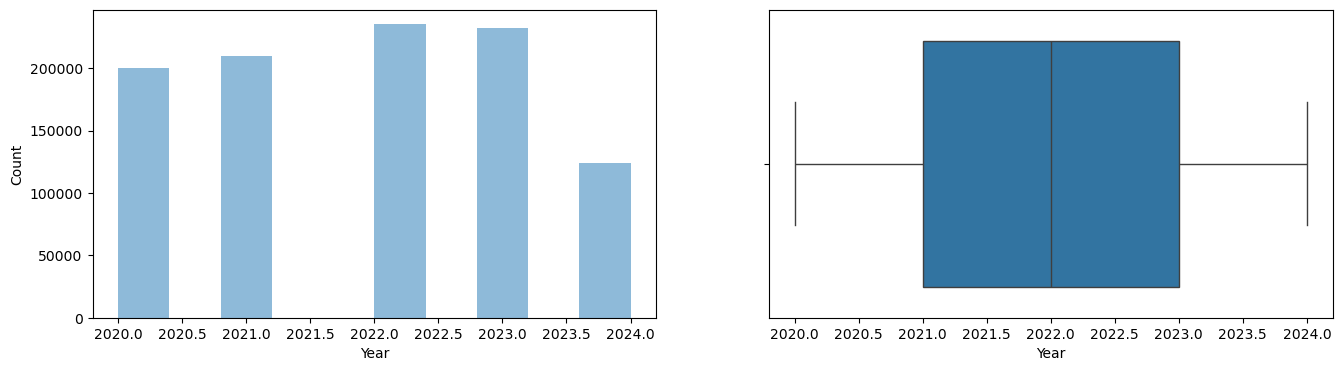

In [37]:
plotvariable(df,'Year')

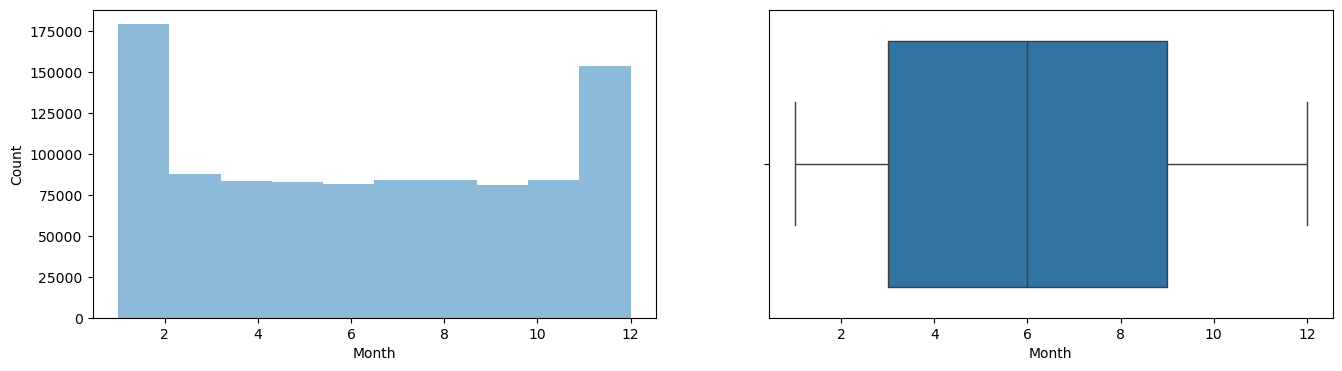

In [60]:
plotvariable(df,'Month')

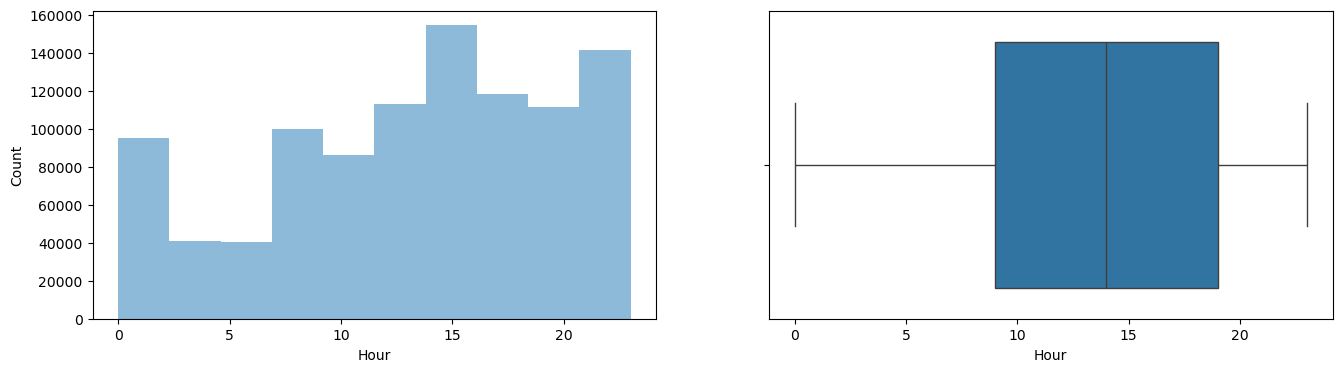

In [61]:
plotvariable(df,'Hour')

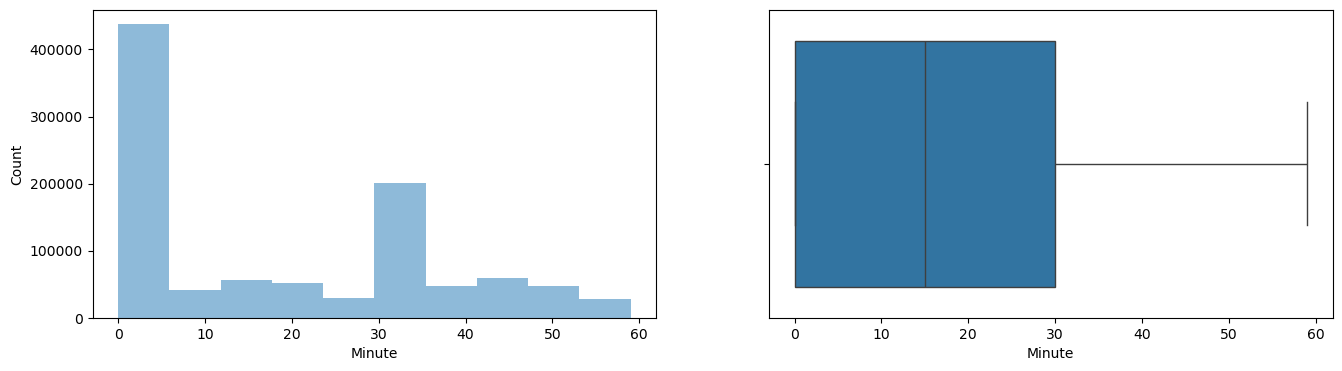

In [62]:
plotvariable(df,'Minute')

In [63]:
df.shape

(1000524, 14)

## 2.5 Construct Data
   - **Categorize raw timestamps**: Group timestamps into time-of-day categories such as **Morning**, **Noon**, **Night**.
   - **Categorize raw date data**: Convert dates into categories for **days of the week** (e.g., Mon, Tues, etc.).

In [65]:
import pandas as pd

# Define a function to classify the time period based on the hour
def classify_time_period(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif hour == 12:
        return 'Noon'
    elif 13 <= hour < 18:
        return 'Evening'
    elif 18 <= hour < 24:
        return 'Night'

# Apply the function to create the 'Time Period' column
df['Time Period'] = df['Hour'].apply(classify_time_period)

# Create a new column 'Day of Week' by combining the year, month, and day into a datetime object
df['Day of Week'] = pd.to_datetime(df[['Year', 'Month', 'Day']]).dt.day_name()

# Reorder the columns to place 'Day of Week' and 'Time Period' appropriately
cols = ['Crm Cd', 'Crm Cd Desc','Date Occ', 'Year','Month','Day', 'Day of Week','Time Occ','Hour', 'Minute','Time Period','Area Name','Premis Desc', 'Lat', 'Lon']
df= df[cols]


# Display the modified DataFrame
df.head()


,Crm Cd,Crm Cd Desc,Date Occ,Year,Month,Day,Day of Week,Time Occ,Hour,Minute,Time Period,Area Name,Premis Desc,Lat,Lon
0,110,CRIMINAL HOMICIDE,2020-02-15,2020,2,15,Saturday,0100,1,0,Early Morning,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274
1,110,CRIMINAL HOMICIDE,2021-09-09,2021,9,9,Thursday,1731,17,31,Evening,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886
2,110,CRIMINAL HOMICIDE,2022-07-03,2022,7,3,Sunday,1350,13,50,Evening,Central,SIDEWALK,34.0417,-118.2444
3,110,CRIMINAL HOMICIDE,2021-05-29,2021,5,29,Saturday,1600,16,0,Evening,Northeast,PARK/PLAYGROUND,34.0851,-118.2292
4,110,CRIMINAL HOMICIDE,2022-08-15,2022,8,15,Monday,0049,0,49,Early Morning,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041


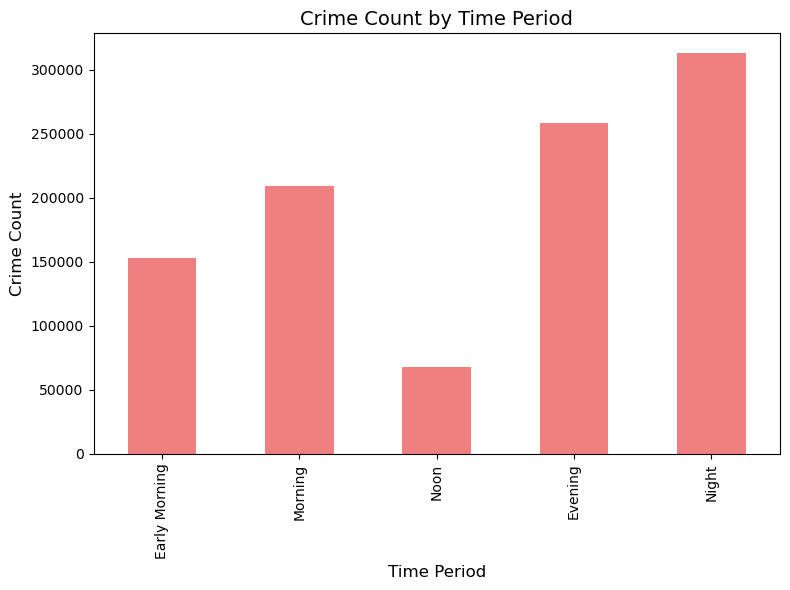

In [66]:
# Define the desired order for the time periods
ordered_time_periods = ['Early Morning', 'Morning', 'Noon', 'Evening', 'Night']

# Group the data by 'Time Period' and count the crimes
crime_by_time_period = df['Time Period'].value_counts()

# Reorder the 'Time Period' index according to the desired order
crime_by_time_period = crime_by_time_period.reindex(ordered_time_periods, fill_value=0)

# Create a bar plot for crime count by time period with the correct order
plt.figure(figsize=(8, 6))
crime_by_time_period.plot(kind='bar', color='lightcoral')

# Add titles and labels
plt.title('Crime Count by Time Period', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# 3) Exploratory Data Analysis




### 3.1 **Top 20 Major Crimes (Bar Graph)**
   - **Insight**:
     - The **most frequent crime** in the dataset is **"Vehicle - Stolen"**, followed by other major crimes like **"Battery - Simple Assault"**, **"Burglary from Vehicle"**, and **"Theft of Identity"**.
     - The **distribution of crime counts** varies widely, with some crimes (like vehicle theft) significantly outnumbering others.
     - This suggests that vehicle-related crimes (especially theft) are among the most common in the area, and further analysis into these categories could help in resource allocation and prevention strategies.


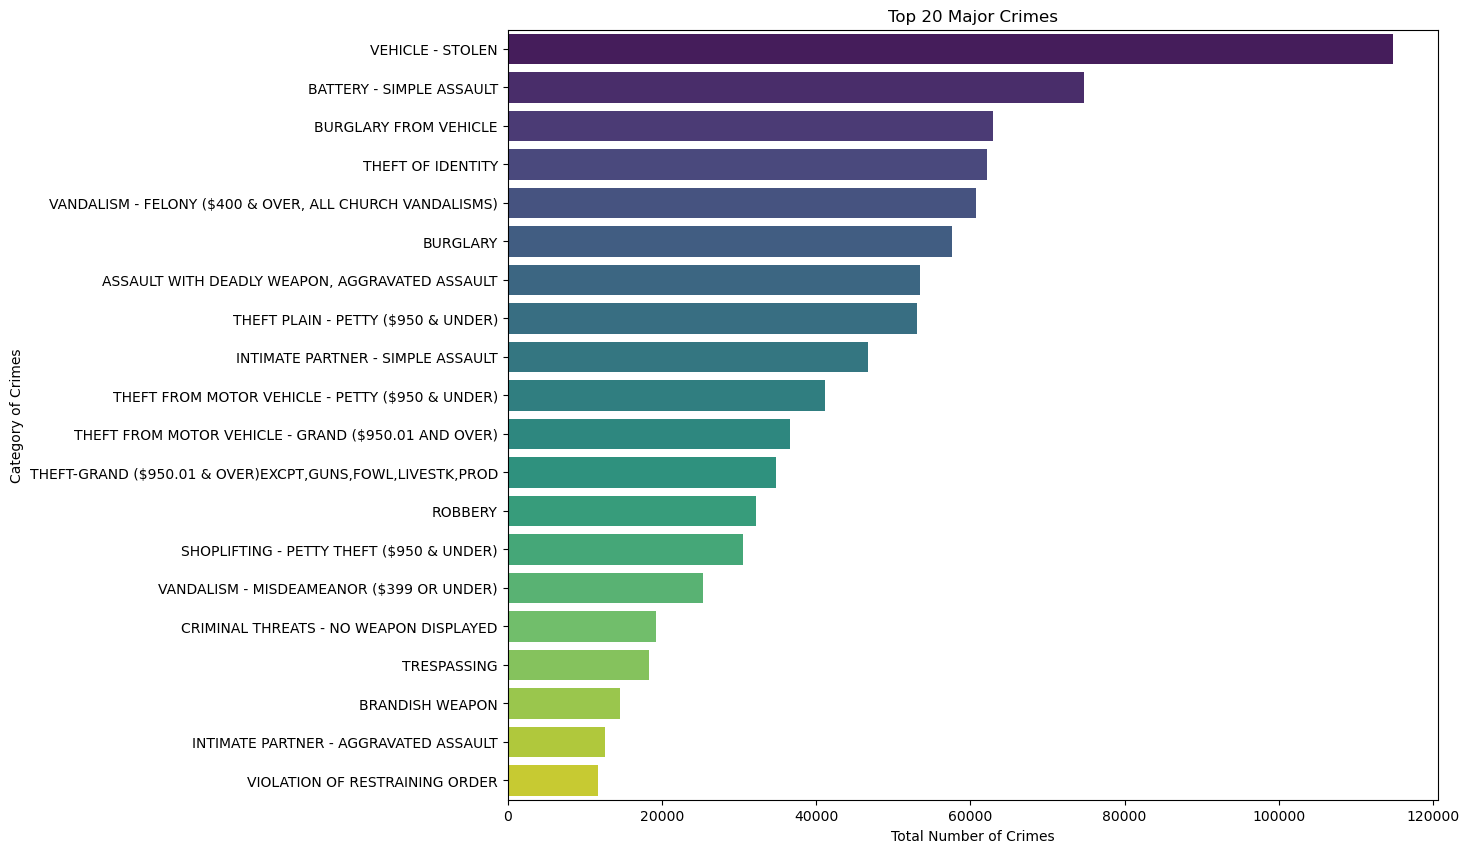

In [70]:
# Plotting various types of crimes
fig = plt.figure(figsize=(12, 10))

# Create a barplot
top_crimes = df['Crm Cd Desc'].value_counts().nlargest(20)  # Show only the top 20 crimes
sns.barplot(x=top_crimes, y=top_crimes.index, palette='viridis')
plt.title('Top 20 Major Crimes')
plt.xlabel('Total Number of Crimes')
plt.ylabel('Category of Crimes')
plt.show()



### 3.2 **Crime Count vs Area Name (Bar Graph)**
   - **Insight**:
     - The area with the highest crime count is **Central**, followed by **77th Street**, **Pacific**, **Southwest**, and **Hollywood**.
     - **Central** stands out with the highest crime count, which could indicate that it is either a densely populated area or an area with a higher concentration of crimes.
     - This highlights key crime hotspots, which could help in targeting crime prevention strategies and law enforcement resources.

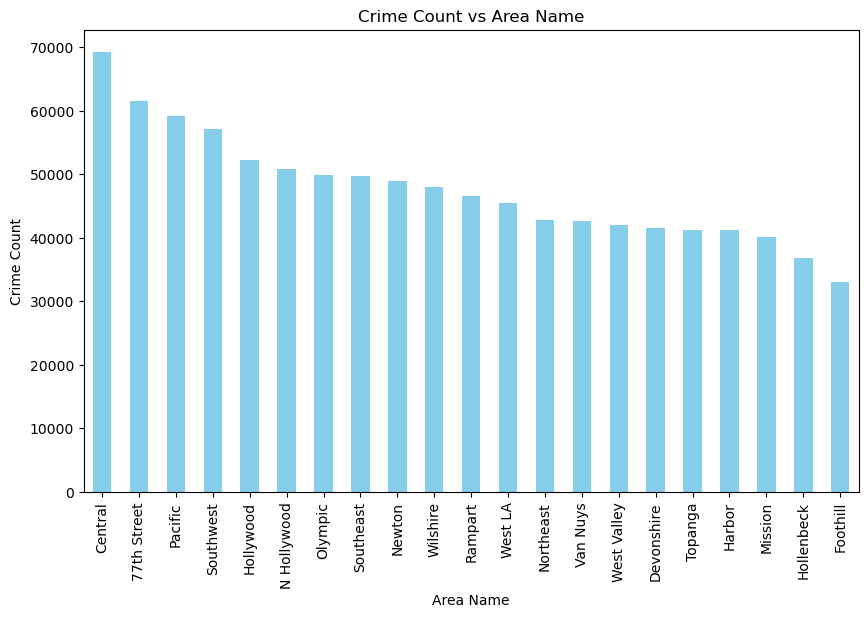

In [72]:
# Count crimes by AREA NAME
crime_counts = df['Area Name'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Count vs Area Name')
plt.xlabel('Area Name')
plt.ylabel('Crime Count')
plt.xticks(rotation=90, ha='center')  # Rotate the labels to make them vertical
plt.show()

### 3.3 **Number of Crimes vs Hour of Day (Line Graph)**
   - **Insight**:
     - There is a **sharp increase in crime counts** starting at **11 AM**, peaking around **12 PM**, and staying relatively high through the afternoon.
     - The graph shows a **decline** in crimes later in the evening, suggesting that **mid-day to afternoon** are the most critical times for criminal activity.
     - Law enforcement could consider focusing efforts during peak crime hours (e.g., midday) to reduce crime rates.

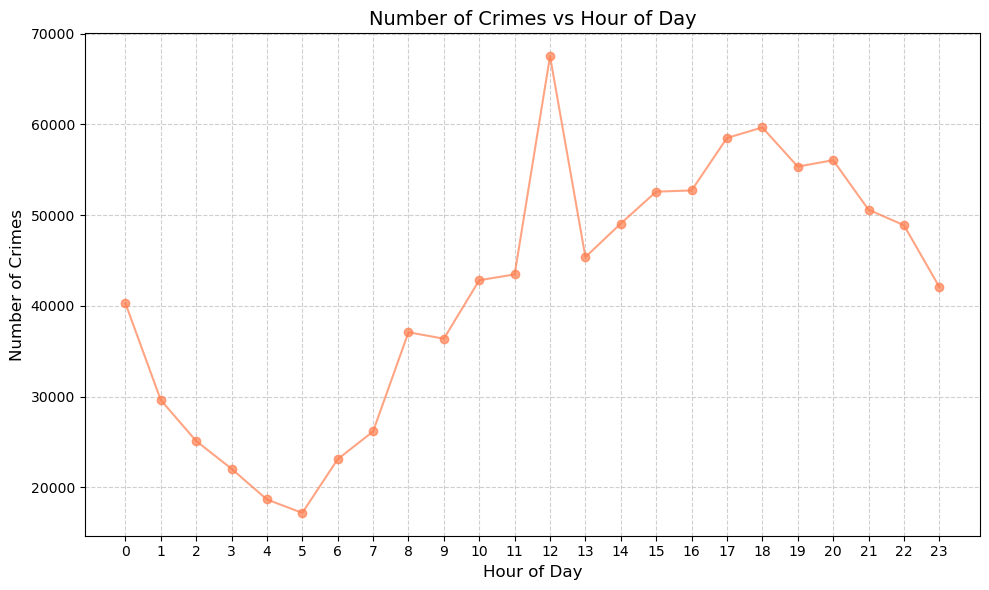

In [74]:
# Create a line plot for the number of crimes by hour
# Group the data by 'Hour' and count the number of crimes
hourly_crime_count = df.groupby('Hour').size()

# Ensure all 24 hours are included in the plot (even if missing from data)
hourly_crime_count = hourly_crime_count.reindex(range(24), fill_value=0)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(hourly_crime_count.index, hourly_crime_count.values,
         marker='o', linestyle='-', color='coral', alpha=0.7)
plt.title('Number of Crimes vs Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(24))  # Include all numbers from 0 to 24
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 3.4 **Crime Time (Hour) vs Area Name (Box Plot)**
   - **Insight**:
   
- Peak Crime Hours: Most crimes occur between late morning and evening (10:00–20:00), with medians around 14:00–18:00 for most areas.

- Area Comparison: Crime timing is consistent across areas, with slight variations in median times (e.g., "77th Street" shows slightly earlier median crime hours).

- Time Coverage: Crimes occur throughout the day, with less frequent incidents during extreme hours (early morning and late night).

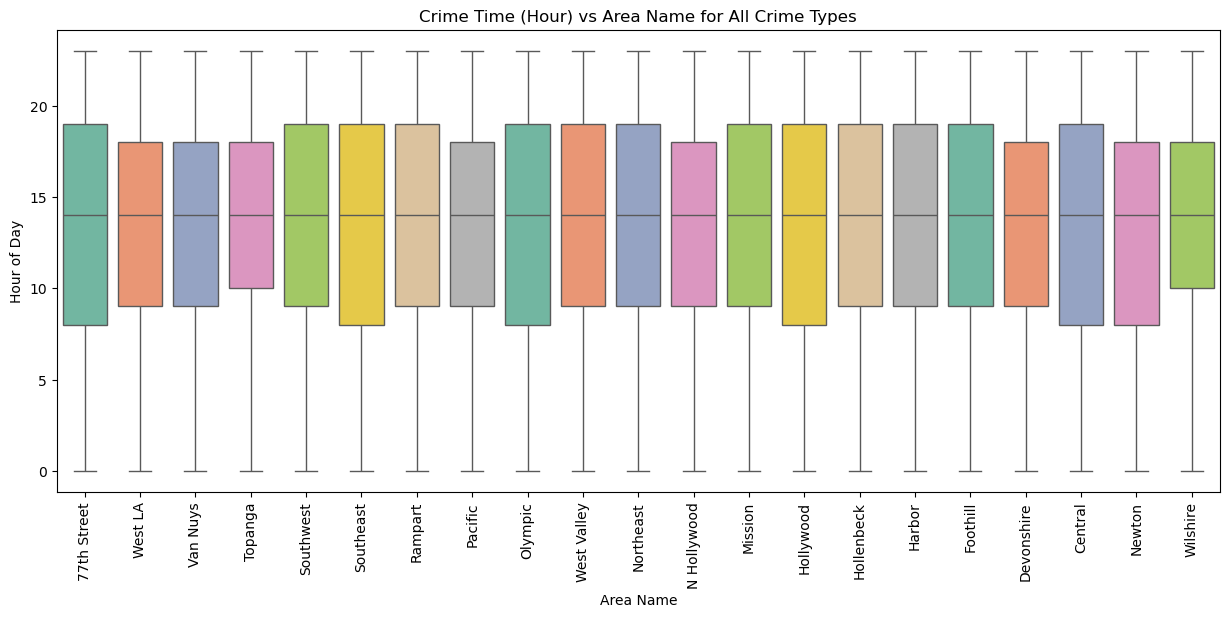

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the areas based on the median crime hour (for all crimes)
sorted_areas = df.groupby('Area Name')['Hour'].median().sort_values().index

# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='Area Name', y='Hour', data=df, order=sorted_areas, palette='Set2')

# Add titles and labels
plt.title('Crime Time (Hour) vs Area Name for All Crime Types')
plt.xlabel('Area Name')
plt.ylabel('Hour of Day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center')

# Show the plot
plt.show()


### 3.5 **Top 10 Crime Count vs Premises Description (Bar Graph)**
   - **Insight**:
     - The most common crime locations are **Street**, **Single Family Dwelling**, and **Multi-Unit Dwelling (Apartment, Duplex, Etc.)**.
     - The large number of crimes occurring on **Streets** suggests that public spaces and streets are major hotspots for criminal activity.
     - Crime prevention strategies can focus more on areas such as **streets and multi-unit dwellings**, which see higher incidents of crime compared to other locations like parking lots or driveways.


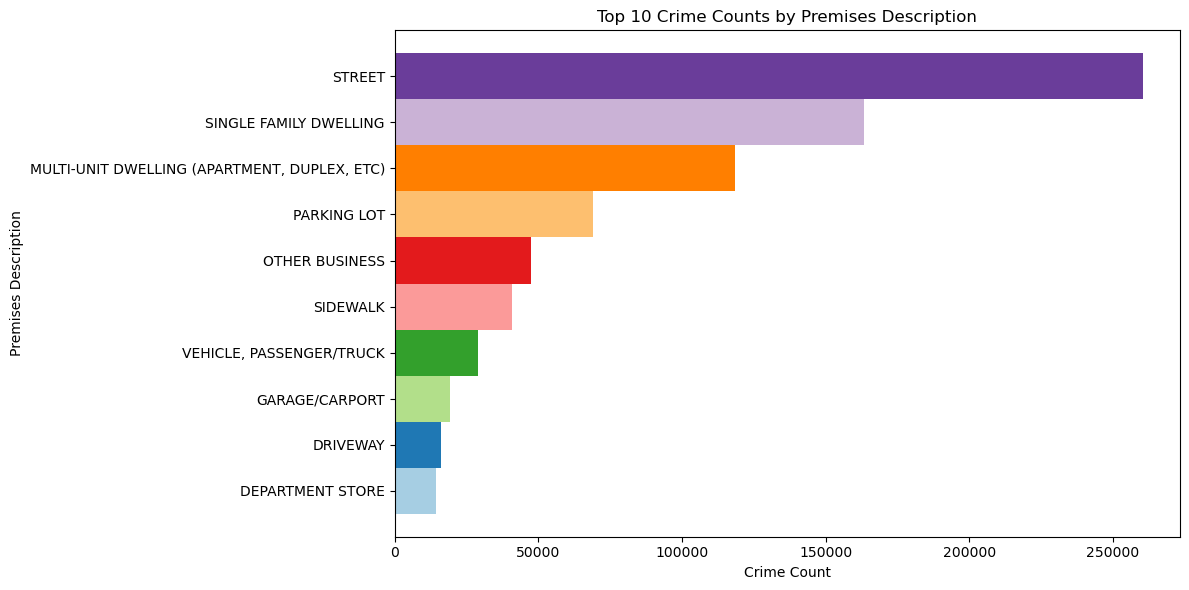

In [78]:
# Count occurrences of each Premises Description
premis_counts = df['Premis Desc'].value_counts()

# Select the top 10 Premises Descriptions
top_10_premis_desc = premis_counts.head(10)

# Reverse the order to ensure the highest count is at the top
top_10_premis_desc = top_10_premis_desc[::-1]

# Create a horizontal bar plot with bars close to each other
plt.figure(figsize=(12, 6))
plt.barh(top_10_premis_desc.index, top_10_premis_desc.values, color=plt.cm.Paired(range(len(top_10_premis_desc))), height=1)  # Adjust the `height` parameter

plt.title('Top 10 Crime Counts by Premises Description')
plt.xlabel('Crime Count')
plt.ylabel('Premises Description')
plt.tight_layout()
plt.show()

In [79]:
# Display all rows of the Series
pd.set_option('display.max_rows', 11)

# Print the crm_cd_counts Series
print(crm_cd_counts)

# Reset the option to default after displaying if needed
pd.reset_option('display.max_rows')

Crm Cd Desc
VEHICLE - STOLEN                                           114859
BATTERY - SIMPLE ASSAULT                                    74810
BURGLARY FROM VEHICLE                                       63000
THEFT OF IDENTITY                                           62216
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     60787
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64


### 3.6 Crime Count by Year and Crime Category




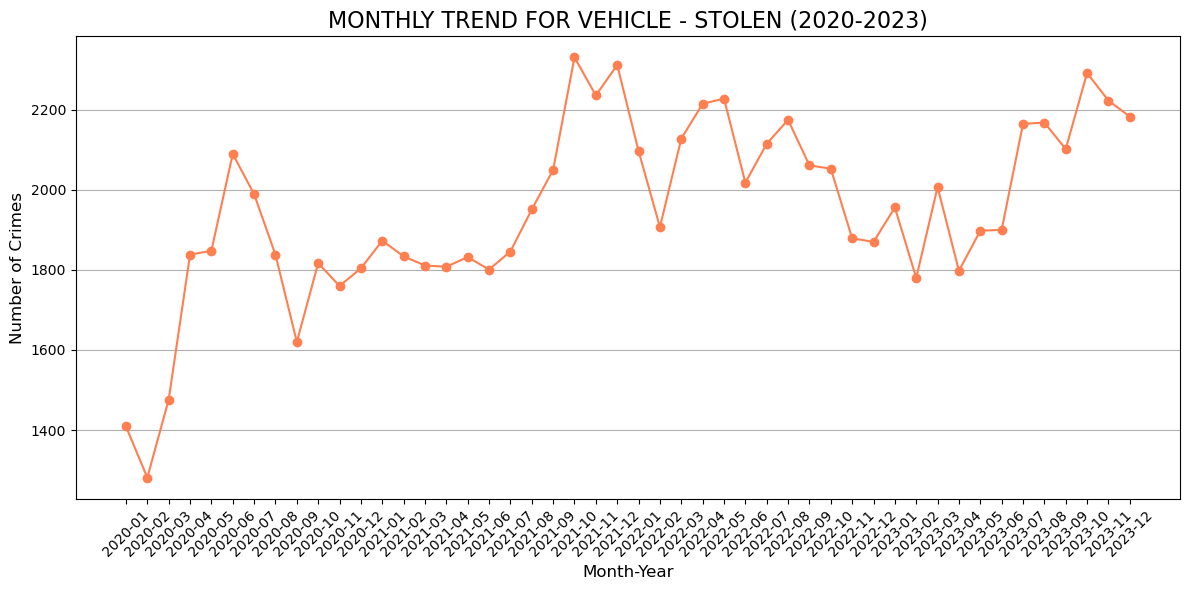

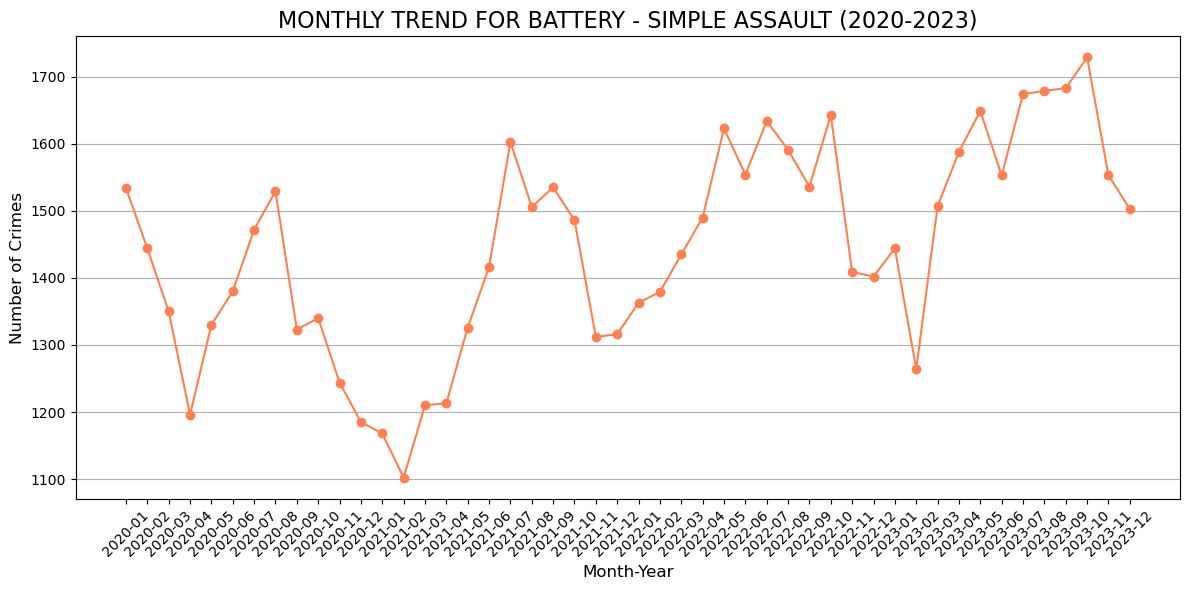

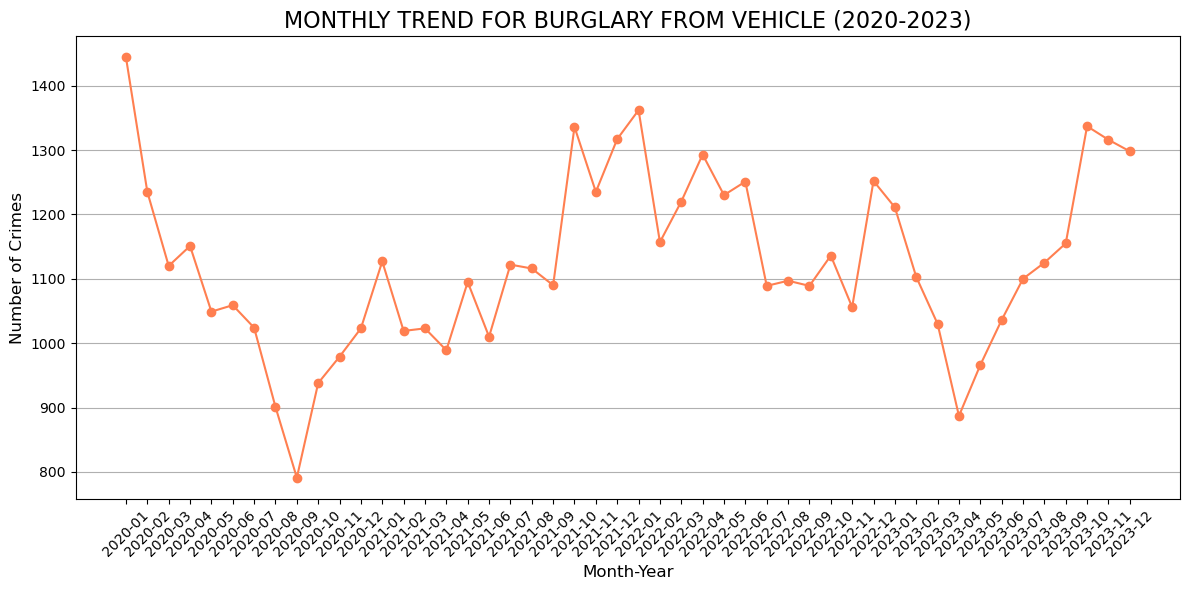

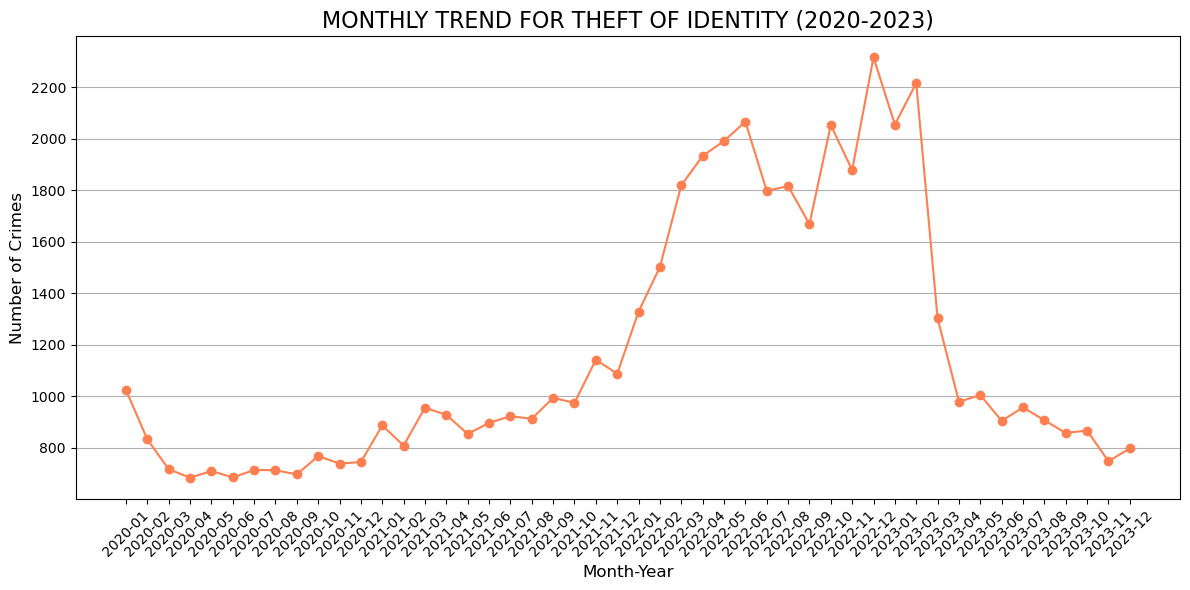

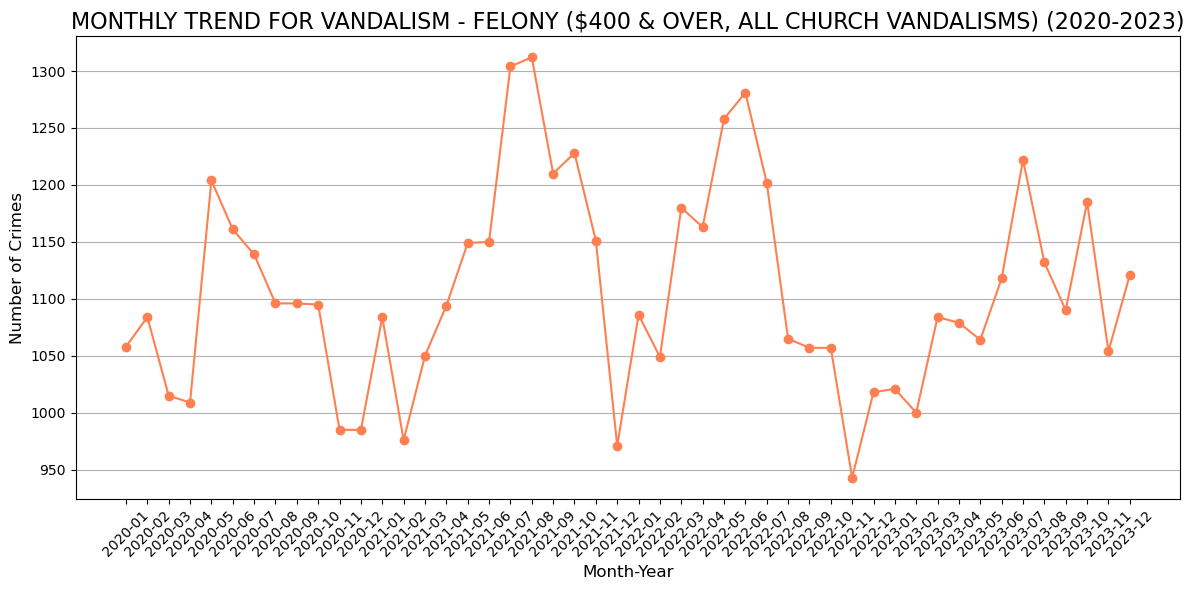

In [82]:
import matplotlib.pyplot as plt

# Define the top 5 crimes
top_5_crimes = [
    "VEHICLE - STOLEN",
    "BATTERY - SIMPLE ASSAULT",
    "BURGLARY FROM VEHICLE",
    "THEFT OF IDENTITY",
    "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"
]

# Filter the data for the top 5 crimes and years 2020–2023
filtered_data = df[(df['Crm Cd Desc'].isin(top_5_crimes)) & (df['Year'].between(2020, 2023))]

# Group the data by Year, Month, and Crime Type, and count occurrences
monthly_counts = (
    filtered_data.groupby(['Year', 'Month', 'Crm Cd Desc'])
    .size()
    .reset_index(name='Count')
)

# Loop through each crime and plot its monthly trend
for crime in top_5_crimes:
    # Filter data for the specific crime
    crime_data = monthly_counts[monthly_counts['Crm Cd Desc'] == crime]

    # Create a "Month-Year" column for better x-axis labels
    crime_data['Month-Year'] = crime_data.apply(lambda row: f"{row['Year']}-{row['Month']:02d}", axis=1)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(crime_data['Month-Year'], crime_data['Count'], marker='o', label=crime, color='coral')

    # Add labels, title, and legend
    plt.title(f'MONTHLY TREND FOR {crime} (2020-2023)', fontsize=16)
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Number of Crimes', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()

    # Show the graph
    plt.show()


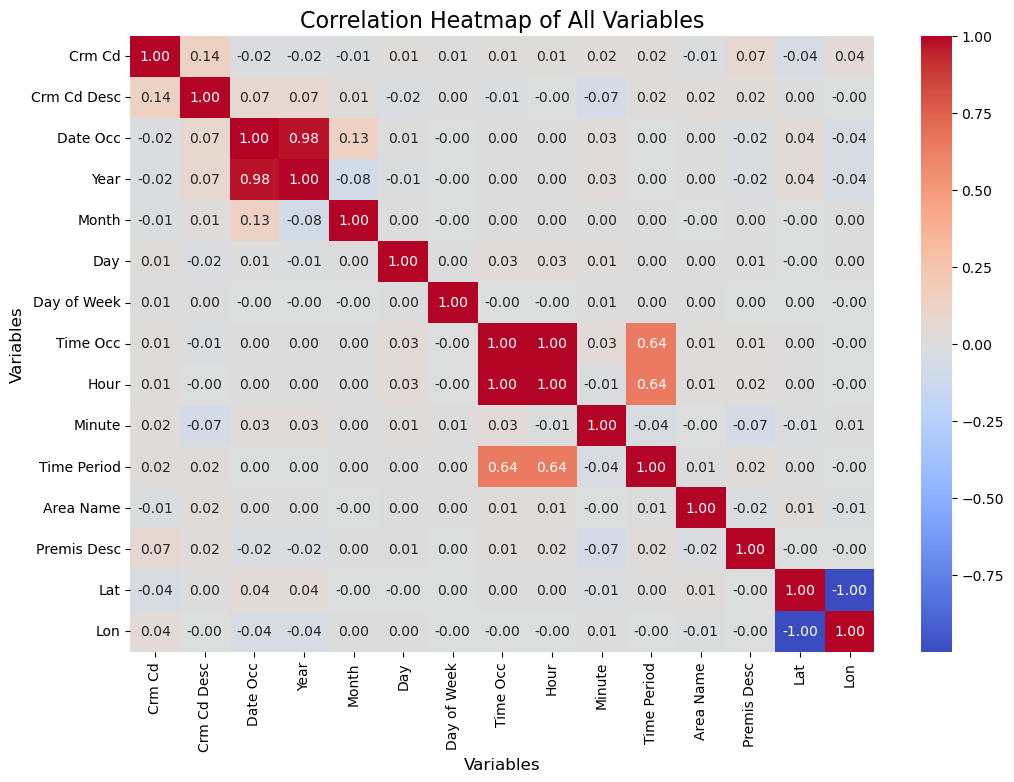

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns into numerical values
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Step 2: Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show correlation values
    fmt=".2f",   # Format the correlation values
    cmap='coolwarm', 
    cbar=True
)

# Add labels and title
plt.title('Correlation Heatmap of All Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Show the plot
plt.show()


# Modeling
- Model Selection:
    - Crime Type Prediction Based On Location and Time
        - Decision Trees or Random Forest (to capture non-linear relationships and interpretability)
        - Gradient Boosting (XGBoost or LightGBM) for robust predictions and better handling of imbalanced data.
        - K-Nearest Neighbors (KNN) could also be used for predicting spatial patterns of thefts based on nearby data points.
        - Naive Bayes
        - Ada Boost

- Time Series Forecasting :
    - Holt-Winter Forecasting

1. Data Extraction

In [132]:
df_new= df.copy()


In [134]:
df_new.head()


,Crm Cd,Crm Cd Desc,Date Occ,Year,Month,Day,Day of Week,Time Occ,Hour,Minute,Time Period,Area Name,Premis Desc,Lat,Lon
0,110,CRIMINAL HOMICIDE,2020-02-15,2020,2,15,Saturday,0100,1,0,Early Morning,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274
1,110,CRIMINAL HOMICIDE,2021-09-09,2021,9,9,Thursday,1731,17,31,Evening,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886
2,110,CRIMINAL HOMICIDE,2022-07-03,2022,7,3,Sunday,1350,13,50,Evening,Central,SIDEWALK,34.0417,-118.2444
3,110,CRIMINAL HOMICIDE,2021-05-29,2021,5,29,Saturday,1600,16,0,Evening,Northeast,PARK/PLAYGROUND,34.0851,-118.2292
4,110,CRIMINAL HOMICIDE,2022-08-15,2022,8,15,Monday,0049,0,49,Early Morning,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041


In [136]:
# Define the top 5 crimes
top_5_crimes = [
    "VEHICLE - STOLEN",
    "BATTERY - SIMPLE ASSAULT",
    "BURGLARY",
    "THEFT OF IDENTITY",
    "SHOPLIFTING - PETTY THEFT ($950 & UNDER)"
]

# Filter the dataframe to keep only rows where 'Crm Cd Desc' is in the top 5
df_top5 = df[df['Crm Cd Desc'].isin(top_5_crimes)]

# Display the filtered dataframe
df_new.head()


,Crm Cd,Crm Cd Desc,Date Occ,Year,Month,Day,Day of Week,Time Occ,Hour,Minute,Time Period,Area Name,Premis Desc,Lat,Lon
0,110,CRIMINAL HOMICIDE,2020-02-15,2020,2,15,Saturday,0100,1,0,Early Morning,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274
1,110,CRIMINAL HOMICIDE,2021-09-09,2021,9,9,Thursday,1731,17,31,Evening,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886
2,110,CRIMINAL HOMICIDE,2022-07-03,2022,7,3,Sunday,1350,13,50,Evening,Central,SIDEWALK,34.0417,-118.2444
3,110,CRIMINAL HOMICIDE,2021-05-29,2021,5,29,Saturday,1600,16,0,Evening,Northeast,PARK/PLAYGROUND,34.0851,-118.2292
4,110,CRIMINAL HOMICIDE,2022-08-15,2022,8,15,Monday,0049,0,49,Early Morning,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041


## Feature Engineering

### 1.Label Encoding

In [140]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode Categorical Variables
label_encoder = LabelEncoder()
categorical_columns = ['Crm Cd Desc', 'Area Name', 'Premis Desc', 'Time Period', 'Day of Week']

# Dictionary to store the mapping of original categories to their encoded values
category_mapping = {}

for col in categorical_columns:
    # Fit and transform the column
    df_top5[col] = label_encoder.fit_transform(df_top5[col])

    # Save the mapping of categories to encoded values
    category_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
for col, mapping in category_mapping.items():
    print(f"Mapping for {col}:")
    for category, code in mapping.items():
        print(f"  {category} -> {code}")
    print()


Mapping for Crm Cd Desc:
  BATTERY - SIMPLE ASSAULT -> 0
  BURGLARY -> 1
  SHOPLIFTING - PETTY THEFT ($950 & UNDER) -> 2
  THEFT OF IDENTITY -> 3
  VEHICLE - STOLEN -> 4

Mapping for Area Name:
  77th Street -> 0
  Central -> 1
  Devonshire -> 2
  Foothill -> 3
  Harbor -> 4
  Hollenbeck -> 5
  Hollywood -> 6
  Mission -> 7
  N Hollywood -> 8
  Newton -> 9
  Northeast -> 10
  Olympic -> 11
  Pacific -> 12
  Rampart -> 13
  Southeast -> 14
  Southwest -> 15
  Topanga -> 16
  Van Nuys -> 17
  West LA -> 18
  West Valley -> 19
  Wilshire -> 20

Mapping for Premis Desc:
  7TH AND METRO CENTER (NOT LINE SPECIFIC) -> 0
  ABANDONED BUILDING ABANDONED HOUSE -> 1
  ABATEMENT LOCATION -> 2
  ABORTION CLINIC/ABORTION FACILITY* -> 3
  AIRCRAFT -> 4
  ALLEY -> 5
  AMTRAK TRAIN -> 6
  AMUSEMENT PARK* -> 7
  APARTMENT/CONDO COMMON LAUNDRY ROOM -> 8
  ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)* -> 9
  AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.) -> 10
  AUTO REPAIR SHOP -> 11
  AUTO S

In [141]:
# Step 2: Apply Log Transformation
df_top5['Lon'] = np.log(df_top5['Lon'] + 1)  # Log transform longitude
df_top5['Lon'] = np.log(df_top5['Lat'] + 1)    # Log transform latitude

In [143]:
df_top5.head()

,Crm Cd,Crm Cd Desc,Date Occ,Year,Month,Day,Day of Week,Time Occ,Hour,Minute,Time Period,Area Name,Premis Desc,Lat,Lon
113950,310,1,2023-01-14,2023,1,14,2,0800,8,0,2,1,197,34.0420,3.556547
113951,310,1,2021-12-02,2021,12,2,4,0800,8,0,2,20,244,34.0817,3.557680
113952,310,1,2021-09-09,2021,9,9,4,1700,17,0,1,16,289,34.2028,3.561126
113953,310,1,2023-05-09,2023,5,9,5,2300,23,0,3,1,214,34.0391,3.556465
113954,310,1,2022-09-16,2022,9,16,0,1940,19,40,3,12,244,34.0011,3.555379


In [146]:
df_top5_filtered = df_top5[df_top5['Crm Cd Desc'] == 3]
df_top5_filtered


,Crm Cd,Crm Cd Desc,Date Occ,Year,Month,Day,Day of Week,Time Occ,Hour,Minute,Time Period,Area Name,Premis Desc,Lat,Lon
324024,354,3,2024-07-06,2024,7,6,2,0945,9,45,2,2,197,34.2428,3.562261
324025,354,3,2021-03-15,2021,3,15,1,0001,0,1,0,20,244,34.0468,3.556684
324026,354,3,2023-06-21,2023,6,21,6,1801,18,1,3,9,244,33.9988,3.555314
324027,354,3,2020-06-16,2020,6,16,5,1900,19,0,3,12,244,33.9947,3.555197
324028,354,3,2023-10-01,2023,10,1,3,1215,12,15,4,11,197,34.0491,3.556750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386235,354,3,2022-02-07,2022,2,7,1,1700,17,0,1,5,244,34.0451,3.556636
386236,354,3,2023-01-27,2023,1,27,0,1130,11,30,2,20,244,34.0399,3.556487
386237,354,3,2022-08-29,2022,8,29,1,1740,17,40,1,20,197,34.0519,3.556830
386238,354,3,2022-03-28,2022,3,28,1,1658,16,58,1,0,244,33.9792,3.554754


In [148]:
df_top5.shape

(339935, 15)

In [150]:
crm_cd_count = df_top5['Crm Cd Desc'].value_counts()

# Display the result
print(crm_cd_count)

Crm Cd Desc
4    114855
0     74792
3     62215
1     57580
2     30493
Name: count, dtype: int64


In [152]:
print(df_top5.dtypes)


Crm Cd                  int64
Crm Cd Desc             int32
Date Occ       datetime64[ns]
Year                    int32
Month                   int32
Day                     int32
Day of Week             int32
Time Occ               object
Hour                    int32
Minute                  int32
Time Period             int32
Area Name               int32
Premis Desc             int32
Lat                   float64
Lon                   float64
dtype: object


### 2. Balancing Dataset Classes

In [155]:
from sklearn.utils import resample

# Find the smallest class size
min_class_size = df_top5['Crm Cd Desc'].value_counts().min()

# Separate the dataset into classes
classes = [df_top5[df_top5['Crm Cd Desc'] == cls] for cls in df_top5['Crm Cd Desc'].unique()]

# Undersample all classes to match the smallest class size
undersampled_classes = [resample(cls, replace=False, n_samples=min_class_size, random_state=42) for cls in classes]

# Combine all undersampled classes into a balanced dataset
balanced_df = pd.concat(undersampled_classes)

# Check the new class distribution
print(balanced_df['Crm Cd Desc'].value_counts())


Crm Cd Desc
1    30493
3    30493
2    30493
4    30493
0    30493
Name: count, dtype: int64


## Splitting Data into Train and Testing Data

In [158]:
from sklearn.model_selection import train_test_split
# Step 1: Split the Data
X = balanced_df[['Lat','Lon','Hour','Minute','Day','Month','Area Name','Premis Desc','Time Period','Day of Week']]
y = balanced_df[['Crm Cd Desc']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Check The Distribution of Test and Train Data

In [161]:
#Check The Distribution of Test and Train Data

print("Distribution in y_train:")
print(y_train.value_counts())

print("\nDistribution in y_test:")
print(y_test.value_counts())


Distribution in y_train:
Crm Cd Desc
1              24506
0              24442
2              24427
3              24395
4              24202
Name: count, dtype: int64

Distribution in y_test:
Crm Cd Desc
4              6291
3              6098
2              6066
0              6051
1              5987
Name: count, dtype: int64


## Classification Model and Evaluation
- Model Evaluation Metrics:
    -  pay attention to metrics like accuracy, precision, recall, and F1-score

### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the Random Forest Classifier
# You can adjust hyperparameters like n_estimators, max_depth, etc.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Train the model
rf_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.49      0.53      6051
           1       0.61      0.62      0.62      5987
           2       0.85      0.91      0.88      6066
           3       0.69      0.69      0.69      6098
           4       0.82      0.88      0.85      6291

    accuracy                           0.72     30493
   macro avg       0.71      0.72      0.71     30493
weighted avg       0.71      0.72      0.72     30493

Accuracy: 72.05%


### Random Forest Tuned

- Search for best Parameter using RandomizedSearchCV

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Test only 20 combinations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


- Retest back the model using the parameter given by RandomizedSearchCV

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Use the best parameters from RandomizedSearchCV
best_params = {
    'n_estimators': 300,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_depth': 30,
    'random_state': 42  # Ensure reproducibility
}

# Step 2: Initialize the Random Forest Classifier with tuned parameters
rf_model = RandomForestClassifier(**best_params)

# Step 3: Train the model
rf_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest Accuracy: {accuracy * 100:.2f}%")


Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.49      0.55      6051
           1       0.62      0.63      0.62      5987
           2       0.84      0.92      0.88      6066
           3       0.69      0.70      0.70      6098
           4       0.82      0.89      0.85      6291

    accuracy                           0.73     30493
   macro avg       0.72      0.73      0.72     30493
weighted avg       0.72      0.73      0.72     30493

Tuned Random Forest Accuracy: 72.67%


### XGBoost

In [165]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 3: Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Step 4: Make Predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.47      0.54      6051
           1       0.65      0.64      0.65      5987
           2       0.85      0.93      0.89      6066
           3       0.71      0.73      0.72      6098
           4       0.81      0.92      0.86      6291

    accuracy                           0.74     30493
   macro avg       0.73      0.74      0.73     30493
weighted avg       0.73      0.74      0.73     30493

Accuracy: 74.19%


### XGBoost Tuned

- Use RandomizedCV to find best Parameter


In [167]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],         # Number of trees
    'max_depth': [3, 5, 7, 10, 15],                    # Maximum depth of the tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],           # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],                      # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],               # Fraction of features used for each tree
    'gamma': [0, 1, 5],                                # Minimum loss reduction to make a split
    'min_child_weight': [1, 3, 5]                      # Minimum sum of instance weight for a child
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,            # Number of parameter settings sampled
    scoring='accuracy',   # Evaluation metric
    cv=3,                 # Cross-validation folds
    verbose=2,            # Print progress
    random_state=42,
    n_jobs=-1             # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Get the best estimator
best_xgb_model = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}


- Retest Back with parameter given

In [170]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the best parameters from RandomizedSearchCV
best_params = {
    'subsample': 0.8,
    'n_estimators': 100,
    'min_child_weight': 3,
    'max_depth': 10,
    'learning_rate': 0.2,
    'gamma': 1,
    'colsample_bytree': 0.8,
    'random_state': 42,          # Ensure reproducibility
    'use_label_encoder': False,  # Avoid warnings for older versions of XGBoost
    'eval_metric': 'logloss'     # Specify evaluation metric
}

# Step 2: Initialize the XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(**best_params)

# Step 3: Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Step 4: Make Predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned XGBoost Accuracy: {accuracy * 100:.2f}%")


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      6051
           1       0.65      0.64      0.65      5987
           2       0.85      0.93      0.89      6066
           3       0.71      0.72      0.72      6098
           4       0.81      0.92      0.86      6291

    accuracy                           0.74     30493
   macro avg       0.73      0.74      0.73     30493
weighted avg       0.73      0.74      0.73     30493

Tuned XGBoost Accuracy: 74.23%


In [ ]:
#import joblib

# Save the model to a file
#joblib.dump(xgb_model, 'crime_xgb_model.pkl')
#print("Model saved as 'crime_xgb_model.pkl'")

Model saved as 'crime_xgb_model.pkl'


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the Decision Tree Classifier
# You can specify hyperparameters like max_depth, criterion, etc.
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Train the model
dt_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53     14887
           1       0.54      0.54      0.54     11537
           2       0.80      0.80      0.80      6130
           3       0.62      0.61      0.62     12412
           4       0.87      0.84      0.85     23021

    accuracy                           0.68     67987
   macro avg       0.67      0.67      0.67     67987
weighted avg       0.68      0.68      0.68     67987

Accuracy: 67.95%


### Decision Tree Tuned

- using RandomizedSearchCV

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Define the parameter grid for DecisionTreeClassifier
param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Measure of split quality
    'splitter': ['best', 'random'],               # Strategy used to choose split
    'max_depth': [None] + list(range(2, 21)),     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],          # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4, 6],             # Minimum number of samples in a leaf node
    'max_features': [None, 'sqrt', 'log2'],       # Number of features to consider for the split
    'random_state': [42]                          # Set random state for reproducibility
}

# Step 2: Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Step 3: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_distributions,
    n_iter=20,               # Number of combinations to try
    scoring='accuracy',       # Metric to optimize
    cv=5,                     # Number of cross-validation folds
    random_state=42,          # Random state for reproducibility
    verbose=2,                # To print progress
    n_jobs=-1                 # Use all processors for parallel computation
)

# Step 4: Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train.values.ravel())  # Use .values.ravel() for y_train

# Step 5: Print the best parameters and best score
print("Best Parameters Found:")
print(random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'splitter': 'best', 'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 13, 'criterion': 'entropy'}


- Retest Back

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the Decision Tree Classifier with the best parameters
dt_model = DecisionTreeClassifier(
    splitter='best',
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features=None,
    max_depth=13,
    criterion='entropy'
)

# Step 2: Train the model
dt_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 3: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 4: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      6051
           1       0.62      0.62      0.62      5987
           2       0.84      0.94      0.89      6066
           3       0.65      0.69      0.67      6098
           4       0.81      0.88      0.84      6291

    accuracy                           0.72     30493
   macro avg       0.70      0.71      0.71     30493
weighted avg       0.71      0.72      0.71     30493

Accuracy: 71.60%


### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the K-Nearest Neighbors Classifier
# Adjust the number of neighbors (n_neighbors) as needed
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to any value

# Step 2: Train the model
knn_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 3: Make Predictions
y_pred = knn_model.predict(X_test)

# Step 4: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.46      0.46     14887
           1       0.52      0.47      0.49     11537
           2       0.70      0.72      0.71      6130
           3       0.66      0.58      0.61     12412
           4       0.83      0.91      0.87     23021

    accuracy                           0.66     67987
   macro avg       0.63      0.63      0.63     67987
weighted avg       0.65      0.66      0.65     67987

Accuracy: 65.85%


### K-Nearest Neighbour Tuned

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Define the KNN model
knn_model = KNeighborsClassifier()

# Step 2: Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 50),  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2]  # Power parameter for Minkowski
}

# Step 3: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Show progress
    random_state=42,  # Seed for reproducibility
    n_jobs=-1  # Use all available processors
)

# Step 4: Fit RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Step 5: Display the best parameters
print("Best Parameters Found:")
print(random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'weights': 'distance', 'p': 2, 'n_neighbors': 26, 'metric': 'manhattan'}


- Retest 

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the KNN Classifier with the best parameters
knn_model = KNeighborsClassifier(
    weights='distance',
    p=2,
    n_neighbors=26,
    metric='manhattan'
)

# Step 2: Train the model
knn_model.fit(X_train, y_train.values.ravel())

# Step 3: Make Predictions
y_pred = knn_model.predict(X_test)

# Step 4: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.37      0.45      6051
           1       0.59      0.53      0.56      5987
           2       0.77      0.91      0.83      6066
           3       0.65      0.68      0.66      6098
           4       0.77      0.91      0.83      6291

    accuracy                           0.68     30493
   macro avg       0.67      0.68      0.67     30493
weighted avg       0.67      0.68      0.67     30493

Accuracy: 68.34%


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the Naive Bayes Classifier
nb_model = GaussianNB()

# Step 3: Train the model
nb_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = nb_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.00      0.01     14887
           1       0.22      0.41      0.29     11537
           2       0.52      0.10      0.16      6130
           3       0.41      0.30      0.35     12412
           4       0.47      0.73      0.57     23021

    accuracy                           0.38     67987
   macro avg       0.47      0.31      0.27     67987
weighted avg       0.47      0.38      0.32     67987

Accuracy: 38.27%


### Naive Bayes Tuned

In [197]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid for GaussianNB
param_grid = {
    'var_smoothing': np.logspace(-9, -1, 100)  # Range of var_smoothing values
}

# Initialize GaussianNB model
nb_model = GaussianNB()

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    random_state=42,
    scoring='accuracy',
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Best parameters
print("Best Parameters Found:")
print(random_search.best_params_)


Best Parameters Found:
{'var_smoothing': 0.0007924828983539186}


- Retest

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the Naive Bayes Classifier with the best parameter
nb_model = GaussianNB(var_smoothing=0.0007924828983539186)

# Step 2: Train the model
nb_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 3: Make Predictions
y_pred = nb_model.predict(X_test)

# Step 4: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.15      0.21      6051
           1       0.34      0.16      0.22      5987
           2       0.60      0.68      0.64      6066
           3       0.41      0.38      0.39      6098
           4       0.36      0.73      0.49      6291

    accuracy                           0.42     30493
   macro avg       0.41      0.42      0.39     30493
weighted avg       0.41      0.42      0.39     30493

Accuracy: 42.32%


### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the AdaBoost Model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
adaboost_model.fit(X_train, y_train.values.ravel())

# Step 3: Make Predictions
y_pred = adaboost_model.predict(X_test)

# Step 4: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.42      0.46     14887
           1       0.53      0.47      0.50     11537
           2       0.71      0.73      0.72      6130
           3       0.62      0.63      0.63     12412
           4       0.83      0.97      0.89     23021

    accuracy                           0.68     67987
   macro avg       0.64      0.64      0.64     67987
weighted avg       0.66      0.68      0.67     67987

Accuracy: 67.95%


### Ada Boost Tuned

In [208]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the model
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Step 2: Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1, 1.5],
    'estimator__max_depth': [1, 2, 3, 4, 5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Step 3: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Step 5: Output the best parameters
print("Best Parameters Found:")
print(random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'n_estimators': 300, 'learning_rate': 0.1, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 3}


- Retest 

In [211]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the AdaBoost model with the best parameters
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2),
    n_estimators=300,
    learning_rate=0.1,
    random_state=42
)

# Step 2: Train the model
adaboost_model.fit(X_train, y_train.values.ravel())

# Step 3: Make Predictions
y_pred = adaboost_model.predict(X_test)

# Step 4: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Calculate and Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.40      0.48      6051
           1       0.59      0.60      0.59      5987
           2       0.85      0.89      0.87      6066
           3       0.66      0.74      0.70      6098
           4       0.80      0.91      0.85      6291

    accuracy                           0.71     30493
   macro avg       0.70      0.71      0.70     30493
weighted avg       0.70      0.71      0.70     30493

Accuracy: 70.93%


## Factor Analysis Modeling

### Principal Component Analysis (PCA)

In [ ]:
# Install factor_analyzer library
!pip install factor-analyzer

# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "/content/WQD7003/cleaned_crime_data.csv"  # Update with your file path if needed
df = pd.read_csv(file_path)

# Select numeric columns for modeling (adjust based on your data)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Factor Analysis example (re-run the rest of the code)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(scaled_data)

# Print the factor loadings
print("Factor Loadings:\n", pd.DataFrame(fa.loadings_, index=numeric_columns))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor Loadings:
                  0         1         2
Crm Cd    0.040386  0.010048  0.017696
Time Occ  0.034732  0.997798 -0.025933
Lat      -0.997465  0.038175  0.013420
Lon       0.997467 -0.037903 -0.013676
Vict Age  0.001774 -0.035489  0.029404
Year     -0.044587  0.005191  0.025656
Month     0.005174  0.001368  0.000360
Day       0.005259  0.034896  0.009498
Hour      0.034069  0.996713 -0.053700
Minute    0.023856  0.041185  0.996441


Explained Variance Ratio (PCA): [0.20107024 0.19998288]


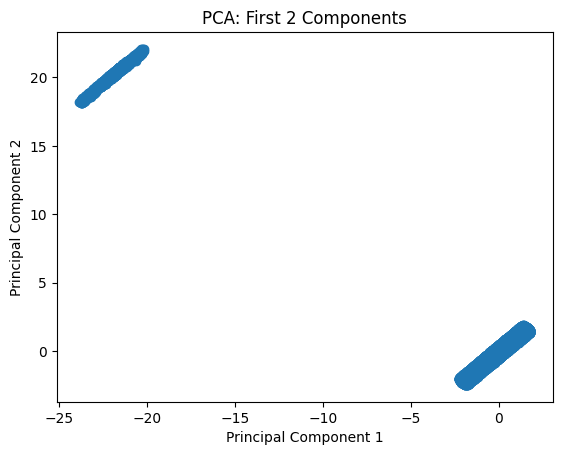

In [ ]:
# 1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# Visualize PCA components
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA: First 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
print(pd.DataFrame(pca.components_, columns=numeric_columns, index=['PC1', 'PC2']))


       Crm Cd  Time Occ       Lat       Lon  Vict Age      Year     Month  \
PC1 -0.030167  0.482190  0.514303 -0.514171 -0.039539  0.050051 -0.005445   
PC2  0.050417  0.514594 -0.481343  0.481473 -0.034156 -0.040410  0.008285   

          Day      Hour    Minute  
PC1  0.028909  0.482412 -0.006891  
PC2  0.040279  0.514345  0.010105  


In [ ]:
import numpy as np  # Import numpy library

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance:", cumulative_variance)


Cumulative Variance: [0.20107024 0.40105311]


### **PCA in Layman Terms**

Principal Component Analysis (PCA) helps to simplify a large datasset with multiple features (like Time Occ, Lat, Lon, etc.) to understand patterns without losing too much information.

####1.  **PCA Components**


- PCA takes all the original features and combines them into new variables (called components) that summarize most of the information in the dataset.
- PC1 (Principal Component 1) and PC2 (Principal Component 2) are two new variables that capture the most important patterns in the data.

####2.   **What the Explained Variance Means**

- PC1 captures 20.1% of the information in the dataset, and PC2 captures 20.0%.
- ogether, these two components explain 40.1% of the total information.
- In simpler terms, instead of looking at all the original features, these two components can be focused to understand about 40% of the dataset.

####3.   **The Scatter Plot**

- The scatter plot shows how the data looks when only PC1 and PC2 are considered.
- Each dot represents one data point from the dataset.
- The groupings or clusters in the plot may indicate patterns, such as similar behaviors or relationships between data points.


This makes it easier to visualize, analyze, and even use the data for further tasks like clustering or modeling.









## Time Series Forecasting
- Using Holt-Winters Forecasting to predict future crime rate for 2020 to Current

### Holt-Winter Forecasting


In [ ]:
df_forecasting = df.copy()
df_forecasting

,Crm Cd,Crm Cd Desc,Date Occ,Year,Month,Day,Day of Week,Time Occ,Hour,Minute,Time Period,Area Name,Premis Desc,Lat,Lon
0,110,CRIMINAL HOMICIDE,2020-02-15,2020,2,15,Saturday,0100,1,0,Early Morning,Hollywood,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1078,-118.3274
1,110,CRIMINAL HOMICIDE,2021-09-09,2021,9,9,Thursday,1731,17,31,Evening,Topanga,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1847,-118.5886
2,110,CRIMINAL HOMICIDE,2022-07-03,2022,7,3,Sunday,1350,13,50,Evening,Central,SIDEWALK,34.0417,-118.2444
3,110,CRIMINAL HOMICIDE,2021-05-29,2021,5,29,Saturday,1600,16,0,Evening,Northeast,PARK/PLAYGROUND,34.0851,-118.2292
4,110,CRIMINAL HOMICIDE,2022-08-15,2022,8,15,Monday,0049,0,49,Early Morning,Olympic,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0690,-118.3041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001107,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",2023-11-12,2023,11,12,Sunday,0014,0,14,Early Morning,Van Nuys,OTHER RESIDENCE,34.1794,-118.4312
1001108,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",2021-09-11,2021,9,11,Saturday,2126,21,26,Night,West LA,SINGLE FAMILY DWELLING,34.0445,-118.4696
1001109,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",2021-04-30,2021,4,30,Friday,1945,19,45,Night,Topanga,SINGLE FAMILY DWELLING,34.1730,-118.5719
1001110,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",2021-08-17,2021,8,17,Tuesday,1300,13,0,Evening,Rampart,OTHER BUSINESS,34.0519,-118.2624


In [ ]:
# grouping date and crimes occured
# original df
date_count = df_forecasting.groupby(['Date Occ']).size().reset_index(name="crimes")
date_count['Date Occ'] = pd.to_datetime(date_count['Date Occ'])

# Filter to include only rows where 'Date Occ' is before or equal to the end of 2023
end_of_2023 = '2023-12-31'
filtered_date_count = date_count[date_count['Date Occ'] <= end_of_2023]

# Display the filtered DataFrame
print(filtered_date_count)

       Date Occ  crimes
0    2020-01-01    1163
1    2020-01-02     527
2    2020-01-03     596
3    2020-01-04     541
4    2020-01-05     506
...         ...     ...
1456 2023-12-27     607
1457 2023-12-28     543
1458 2023-12-29     614
1459 2023-12-30     589
1460 2023-12-31     544

[1461 rows x 2 columns]


In [ ]:
#checking for null values
filtered_date_count.isnull().sum()

Date Occ    0
crimes      0
dtype: int64

In [ ]:
# converting date column as index
filtered_date_count = filtered_date_count.groupby('Date Occ').sum()
filtered_date_count

,crimes
Date Occ,
2020-01-01,1163
2020-01-02,527
2020-01-03,596
2020-01-04,541
2020-01-05,506
...,...
2023-12-27,607
2023-12-28,543
2023-12-29,614


In [ ]:
filtered_date_count = filtered_date_count.resample(rule = 'MS').sum()
filtered_date_count

,crimes
Date Occ,
2020-01-01,18565
2020-02-01,17276
2020-03-01,16182
2020-04-01,15700
2020-05-01,17218
2020-06-01,17059
2020-07-01,17152
2020-08-01,16894
2020-09-01,15652


In [ ]:
print(filtered_date_count.columns)


Index(['crimes'], dtype='object')


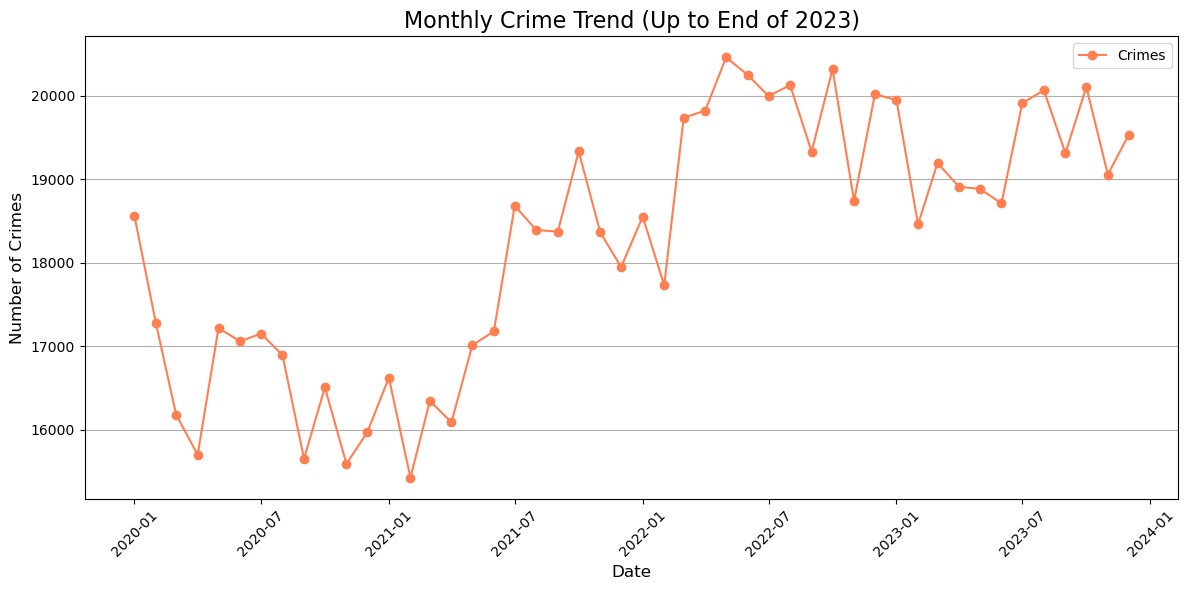

In [ ]:
filtered_date_count = filtered_date_count.reset_index()
plt.figure(figsize=(12, 6))
plt.plot(filtered_date_count['Date Occ'], filtered_date_count['crimes'], marker='o', color='coral', label='Crimes')

# Add labels, title, and grid
plt.title('Monthly Crime Trend (Up to End of 2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
filtered_date_count

,Date Occ,crimes
0,2020-01-01,18565
1,2020-02-01,17276
2,2020-03-01,16182
3,2020-04-01,15700
4,2020-05-01,17218
5,2020-06-01,17059
6,2020-07-01,17152
7,2020-08-01,16894
8,2020-09-01,15652
9,2020-10-01,16507


In [ ]:
# Total number of rows in the dataset
total_rows = len(filtered_date_count)
total_rows

48

C:\Users\Rafiq\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


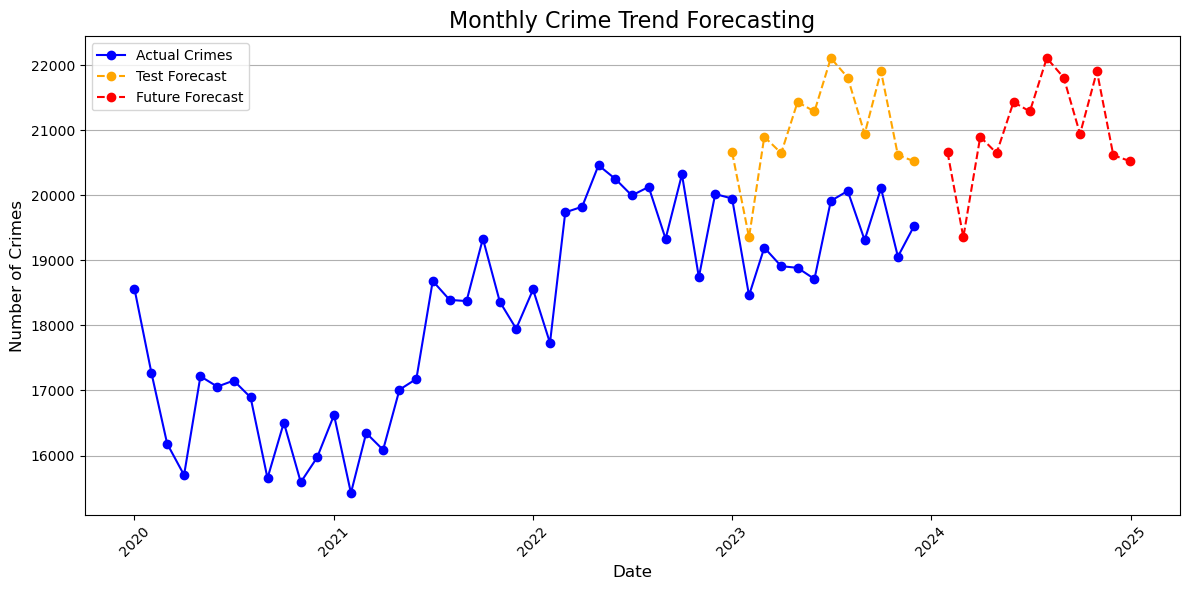

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Reset index to ensure time-series compatibility
filtered_date_count = filtered_date_count.sort_values('Date Occ')
filtered_date_count['Date Occ'] = pd.to_datetime(filtered_date_count['Date Occ'])

# Split the data into train and test
train = filtered_date_count.iloc[:-12]  # Use all but the last 12 months for training
test = filtered_date_count.iloc[-12:]  # Last 12 months for testing

# Initialize the Holt-Winters model
hwmodel = ExponentialSmoothing(
    train['crimes'],
    trend='add',
    seasonal='mul',
    seasonal_periods=12  # Monthly seasonality
).fit()

# Forecast for the test set and beyond
test_forecast = hwmodel.forecast(len(test))  # Forecast for the test set length
future_forecast = hwmodel.forecast(12)      # Forecast the next 12 months

# Plot the actuals and forecasts
plt.figure(figsize=(12, 6))
plt.plot(filtered_date_count['Date Occ'], filtered_date_count['crimes'], marker='o', color='blue', label='Actual Crimes')
plt.plot(test['Date Occ'], test_forecast, marker='o', color='orange', linestyle='--', label='Test Forecast')
future_dates = pd.date_range(filtered_date_count['Date Occ'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
plt.plot(future_dates, future_forecast, marker='o', color='red', linestyle='--', label='Future Forecast')

# Add labels, title, and grid
plt.title('Monthly Crime Trend Forecasting', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


### Evaluation

MAE (Mean Absolute Error):
- Measures the average magnitude of errors without considering their direction.
Smaller values indicate better model performance.
Unit: Same as the crimes column.

MSE (Mean Squared Error):
- Penalizes larger errors more than smaller ones because errors are squared.
Useful for highlighting large prediction errors.

RMSE (Root Mean Squared Error):
- The square root of MSE, making it interpretable in the same units as the crimes data.
Often preferred because it provides a more intuitive error measurement.

Mean Absolute Percentage Error (MAPE):
- mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual and predicted values
actual = test['crimes']
predicted = test_forecast

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae} Crime")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1673.5236756533875
Mean Squared Error (MSE): 3124829.158179959
Root Mean Squared Error (RMSE): 1767.7186309421413


In [ ]:
avg_crimes = test['crimes'].mean()
print(f"Average Monthly Crimes: {avg_crimes}")
error_ratio = (rmse / avg_crimes) * 100
print(f"RMSE as Percentage of Average Crimes: {error_ratio:.2f}%")


Average Monthly Crimes: 19341.833333333332
RMSE as Percentage of Average Crimes: 9.14%


In [ ]:
avg_crimes = test['crimes'].mean()
print(f"Average Monthly Crimes: {avg_crimes}")
error_ratio = (rmse / avg_crimes) * 100
print(f"RMSE as Percentage of Average Crimes: {error_ratio:.2f}%")
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 8.67%


# Aknowledgments

This project was made possible through the collaboration and hard work of our amazing team:

- **MUHAMAD RAFIQ IQBAL** – Data Cleaning & Preprocessing
- **MUHAMMAD HAKIM BIN NASARUDDIN** – Data Visualization
- **LOW E-JIE** – Statistical Analysis
- **NICHOLAS OOI JIAWEI** – Model Development
- **MUHAMAD NOOR FAQEH BIN BAKAR** – Project Lead & Documentation

Special thanks to our mentor **PROF. DR. LOO CHU KIONG** for guidance and support.

---

<center>
    <img src="um_logo.png" alt="Universiti Malaya Logo" width="200">
    <h2><b>Universiti Malaya</b></h2>
    <p><i>Thank you for your attention!</i></p>
</center>
